In [1]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter

dataset = pd.read_csv('/Users/eddie/Downloads/Agriculture Data.xlsx - Sheet1 (1).csv')

X = pd.DataFrame(dataset.iloc[:,:11].values)
Y = pd.DataFrame(dataset.iloc[:,11:].values)
print(X)
print(Y)
# oversample = SMOTE(sampling_strategy=1)
# X_train, Y_train = oversample.fit_resample(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
counter = Counter(Y)
print(counter)

print(X_train.shape)
print(Y_train.shape)

features = pd.DataFrame(dataset.iloc[:,:16])
features = features.columns
print(features)

      0   1   2   3   4   5   6   7   8   9   10
0      3   2   2  25  26   9   0   0   0   0   0
1      3   3   1  61  17   9   0   0   0   0   0
2      3   3   1  65  16   9   0   0   0   0   0
3      3   2   1  49  17   9   0   0   0   1   0
4      3   1   1  59  28   9   0   0   0   0   0
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
2416   1   1   1  50  25   9   0   0   0   0   0
2417   1   2   1  58  49   8   0   0   0   0   0
2418   1   2   1   3  36   9   0   0   0   0   0
2419   3   2   2  48  40   9   0   0   0   0   0
2420   1   1   1  81  37   7   0   0   0   0   0

[2421 rows x 11 columns]
      0
0     0
1     1
2     1
3     0
4     1
...  ..
2416  1
2417  0
2418  1
2419  0
2420  1

[2421 rows x 1 columns]
Counter({0: 1})
(1936, 11)
(1936, 1)
Index(['Location of Incident', 'Time', 'Gender', 'Age', 'State',
       'Injury Agent ', 'Confined Space', 'Grain Involved', 'Alcohol/Drugs',
       'Seatbelt', 'Helmet', 'Fatal'],
      dtype='object')


In [2]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier 

In [3]:
from bayes_opt import BayesianOptimization, UtilityFunction
import warnings
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
def objective(n_estimators, learning_rate,max_depth, min_samples_split,max_features):
    model = GradientBoostingClassifier(n_estimators=int(n_estimators),
                                  learning_rate = learning_rate,max_depth = int(max_depth),
                                  min_samples_split=int(min_samples_split), max_features=int(max_features))
    
    return cross_val_score(model, X_train, Y_train, cv=10,scoring = 'roc_auc').mean()
param_bounds = {
    'n_estimators': (10, 250),
    'learning_rate': (0.0000001,1),
    'max_depth': (1, 100),
    'min_samples_split': (2, 50),
    'max_features': (1, 100),
}
optimizer = BayesianOptimization(f=objective, pbounds=param_bounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=25)
best_params = optimizer.max['params']

|   iter    |  target   | learni... | max_depth | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 1         | 0.5614    | 0.3745    | 95.12     | 73.47     | 30.74     | 47.44     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 2         | 0.5896    | 0.156     | 6.75      | 86.75     | 30.85     | 179.9     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 3         | 0.5424    | 0.02058   | 97.02     | 83.41     | 12.19     | 53.64     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 4         | 0.5548    | 0.1834    | 31.12     | 52.95     | 22.73     | 79.89     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 5         | 0.5555    | 0.6119    | 14.81     | 29.92     | 19.59     | 119.5     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 6         | 0.5575    | 0.7094    | 11.43     | 84.05     | 34.21     | 177.3     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 7         | 0.5579    | 0.5204    | 20.97     | 42.28     | 31.84     | 221.6     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 8         | 0.5517    | 0.1604    | 90.72     | 95.62     | 14.71     | 158.0     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 9         | 0.5871    | 0.1605    | 6.755     | 86.76     | 30.86     | 179.9     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 10        | 0.5983    | 0.1199    | 6.713     | 86.71     | 30.82     | 179.9     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 11        | 0.6041    | 0.03039   | 6.734     | 86.67     | 30.8      | 180.0     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 12        | 0.5822    | 0.1455    | 6.705     | 86.58     | 30.74     | 180.0     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 13        | 0.5832    | 1e-07     | 6.638     | 86.8      | 30.78     | 180.0     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 14        | 0.5832    | 1e-07     | 6.817     | 86.63     | 30.87     | 179.9     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 15        | 0.6011    | 0.04972   | 6.642     | 86.64     | 30.91     | 180.0     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 16        | 0.5432    | 0.9422    | 82.11     | 14.16     | 29.07     | 42.25     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 17        | 0.5832    | 0.1456    | 6.53      | 86.65     | 30.96     | 179.8     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 18        | 0.5483    | 0.9289    | 68.87     | 47.63     | 48.28     | 235.0     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 19        | 0.5832    | 1e-07     | 6.728     | 86.63     | 30.89     | 180.2     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 20        | 0.5832    | 1e-07     | 6.581     | 86.56     | 30.8      | 179.9     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 21        | 0.5564    | 0.8901    | 7.752     | 42.79     | 41.95     | 94.12     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 22        | 0.6014    | 0.06694   | 6.435     | 86.68     | 31.19     | 180.0     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 23        | 0.5844    | 1e-07     | 6.58      | 86.58     | 31.16     | 180.0     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 24        | 0.5923    | 0.09454   | 6.405     | 86.72     | 31.04     | 180.1     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 25        | 0.5555    | 0.9178    | 39.18     | 66.52     | 15.74     | 47.27     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 26        | 0.5844    | 1e-07     | 6.437     | 86.86     | 31.17     | 180.0     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 27        | 0.5836    | 0.2079    | 6.326     | 86.65     | 31.26     | 180.1     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 28        | 0.5862    | 0.1897    | 6.552     | 86.74     | 31.17     | 180.0     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 29        | 0.5584    | 0.54      | 74.66     | 18.88     | 38.71     | 82.91     |


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

| 30        | 0.5679    | 0.007378  | 14.39     | 68.97     | 44.81     | 70.3      |


In [4]:
model = GradientBoostingClassifier(n_estimators =int( best_params['n_estimators']),learning_rate =best_params['learning_rate'],max_depth = int(best_params['max_depth']),min_samples_split=int(best_params['min_samples_split']),max_features = int(best_params['max_features']))
model.fit(X_train, Y_train)

c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.03038781953262136, max_depth=6,
                           max_features=86, min_samples_split=30,
                           n_estimators=179)

In [5]:
res = model.predict(X_test)
print(res)
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

[1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
      0
1931  1

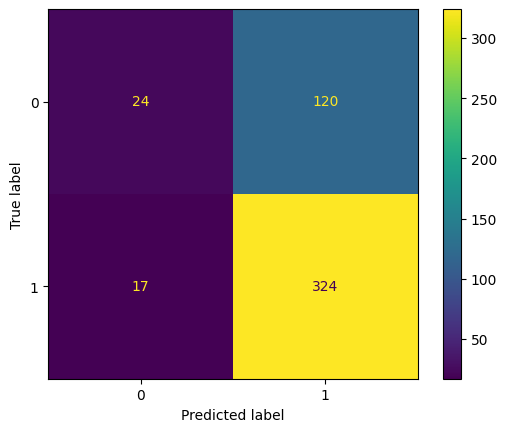

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, res)
cm_display = ConfusionMatrixDisplay(confusionmatrix, display_labels=[0,1])
cm_display.plot()

c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


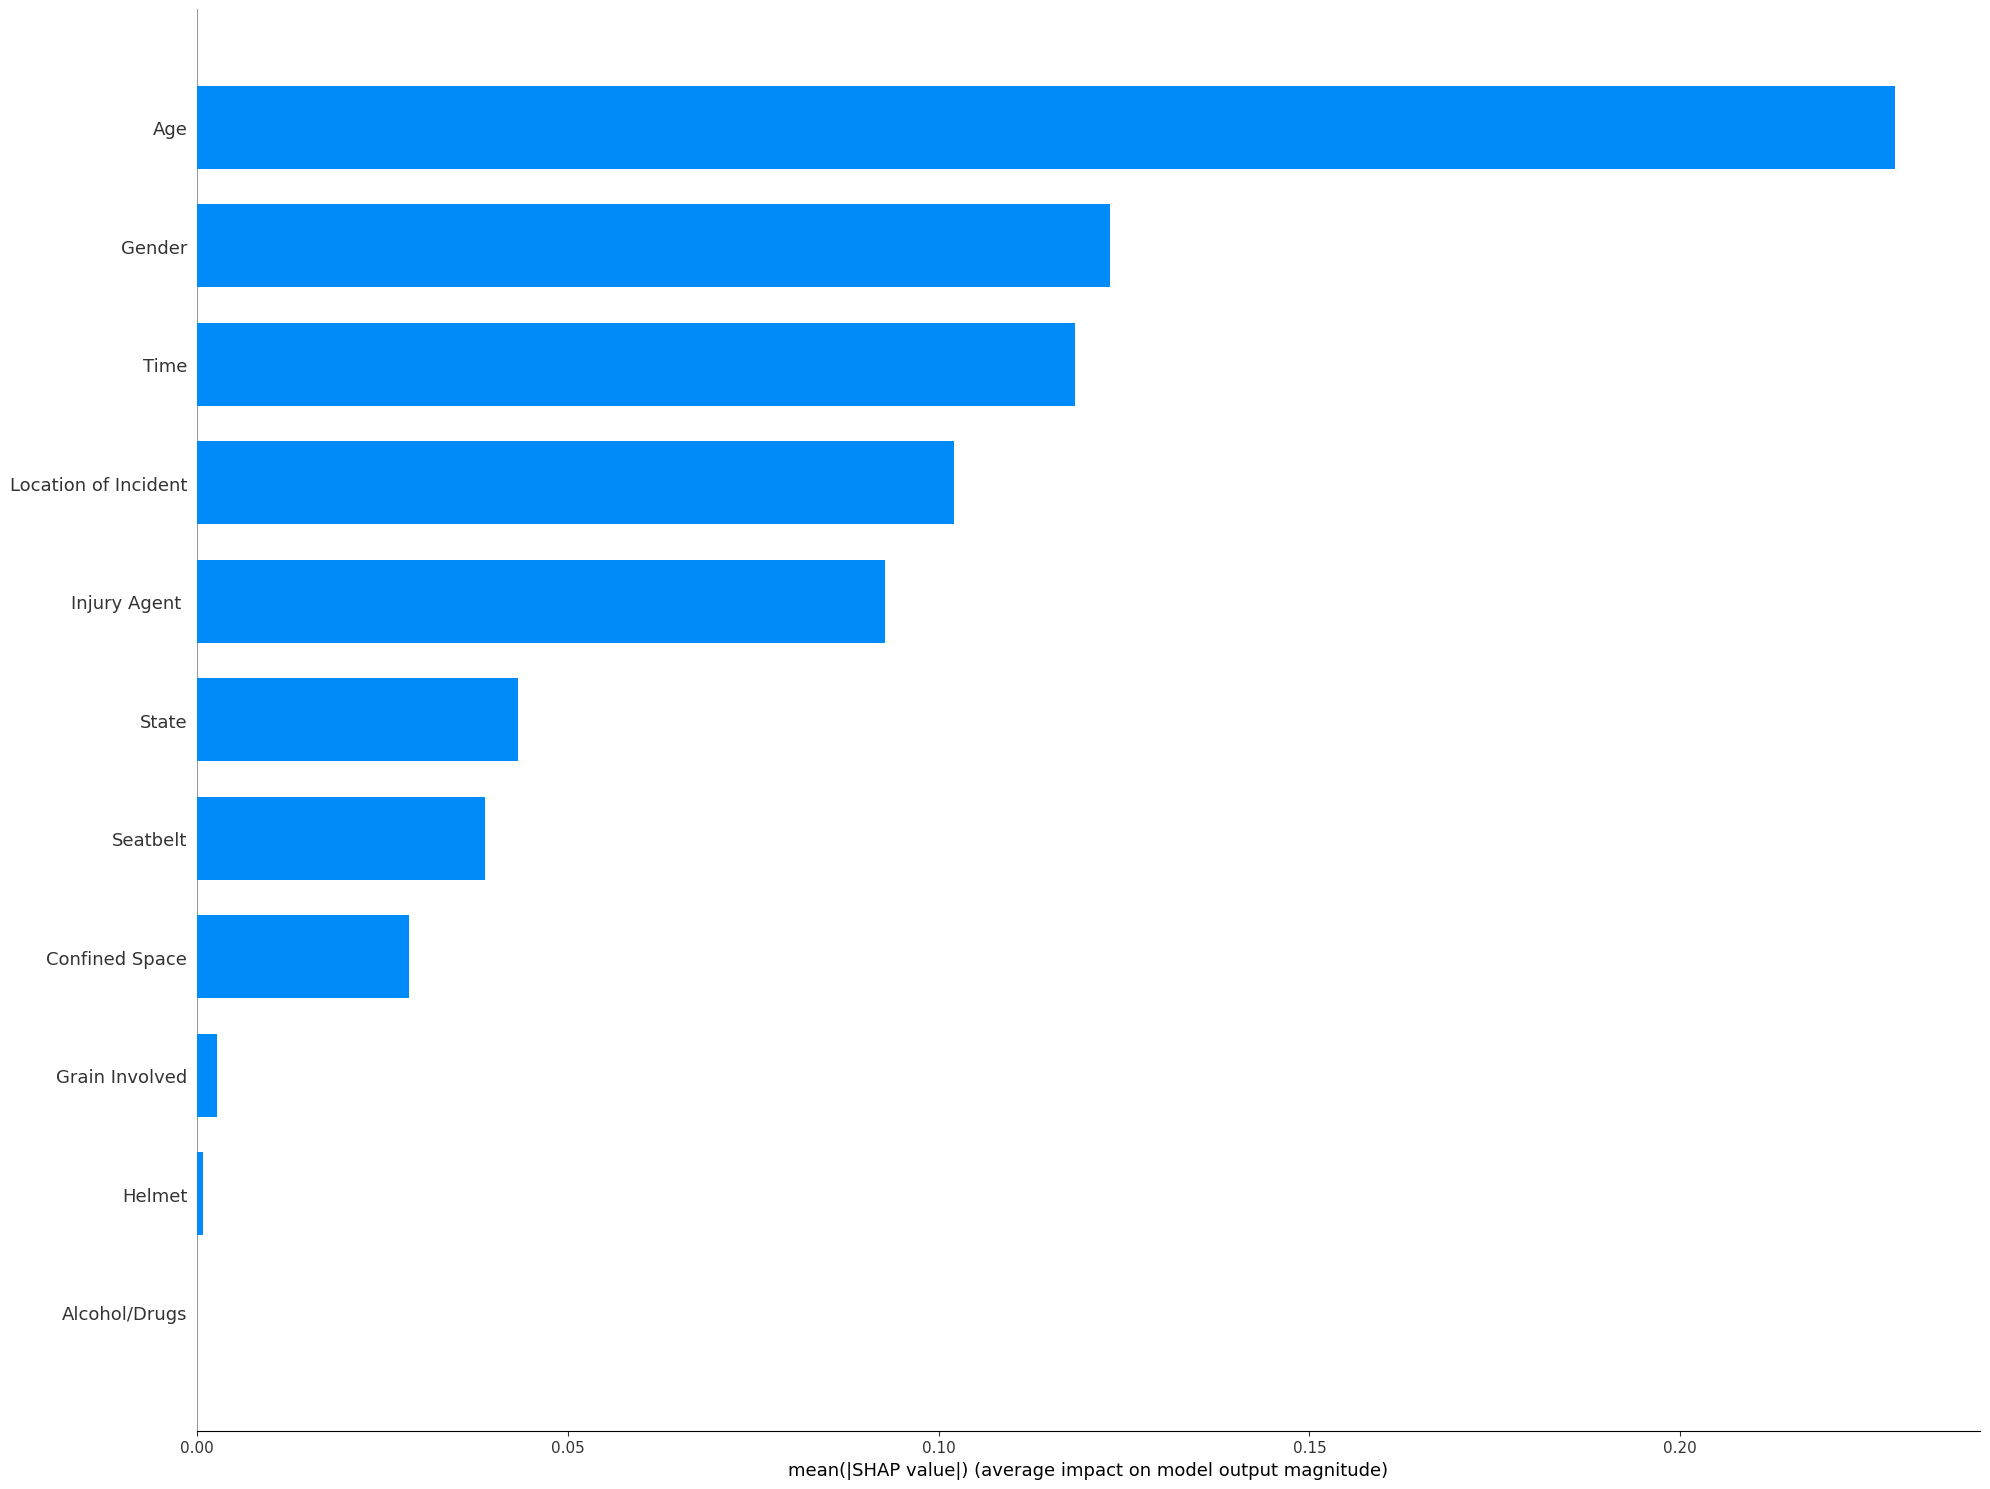

In [7]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)

c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\shap\plots\_utils.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color == "shap_red":
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\shap\plots\_utils.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color == "shap_blue":
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\_api\__init__.py:125: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if val not in values:


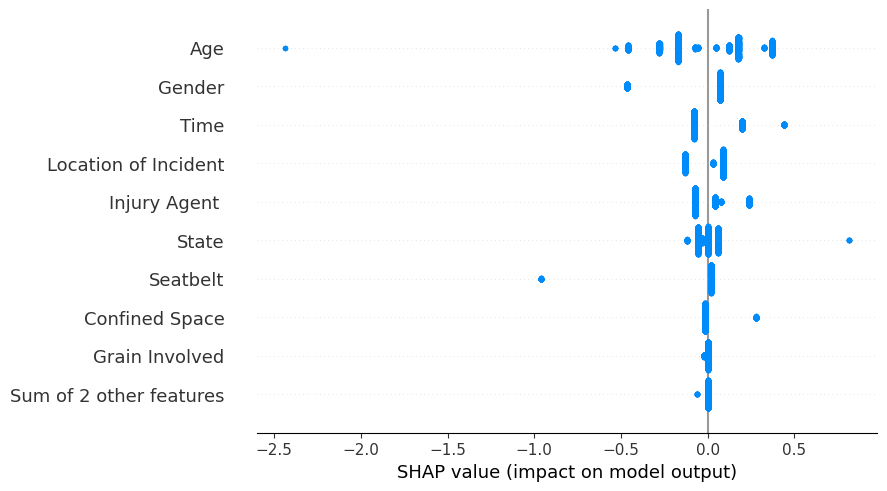

In [8]:
explanation = shap.Explanation(
    values=shap_values, 
    feature_names=features
)
shap.plots.beeswarm(explanation)